In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### THE GIST:
Stan wants the following:

1. An SPECIFIC exploratory analysis and (in-depth) correlation analysis for the given RCT II dataset
2. A GENERAL exploratory analysis script that would be able to work for any similar csv file
3. (If possible) an integration of a machine learning model predicting QOL for the general EDA script. Process here would be to train on the given set using a randomized 80/20 split and then add this model to the general EDA script.

**SOME NOTES/ CONSIDERATIONS:**
- the specific EDA should compare and contrast groups A and B, as well as A1 and B1 (A1 vs B1 is MORE important than A vs B. Other configurations probably need not apply)
- I need to focus on identifying metrics with the highest importance (in specific EDA) and visualize these
- some expository writing, but don't get carried away since I don't actually know anything about the metrics involved
- lots of vizzes, and get creative!
- general EDA should assume varied number of features, variability as far as group configurations go, varied number of subjects, etc. This actually could be a bit tricky but you got this king

### HAVE SOMETHING COMPLETE, READY TO SHARE BY MONDAY (SPECIFIC EDA & CORRELATION ANALYSIS)

In [2]:
# import data
rctii = pd.read_csv("../data//RCT II Anonymized Data 2025-09-29.csv")
display(rctii.head(5))

,Subject,Group,Group.2,Metric1,Metric2,Metric3,Metric4,Metric5,Metric6,Metric7,Metric8,Metric9,Metric10,Metric11,Metric12,Metric13,Metric14,Metric15,QOL Chg
0,A001,A,0,0.262028,No,-1.503847,-1.132909,Yes,1,0.180529,NaN,NaN,NaN,NaN,0.379302,1.260856,4.852986,0.283523,NaN
1,A002,A,1,-0.035071,No,-0.418831,0.906327,No,0,-0.820439,-0.567389,-0.567389,-0.645823,-0.451589,-0.112891,-0.699697,-0.562986,-1.057854,-1.872500
2,A003,A,1,-1.372828,No,1.804914,-1.132909,No,0,1.181496,2.443926,2.443926,4.583993,3.892942,NaN,1.437043,2.265533,0.227413,NaN
3,A004,A,0,0.496643,Yes,1.099163,-0.113291,Yes,1,0.180529,0.054596,0.054596,1.969085,0.938661,-0.710555,1.227118,-0.064781,NaN,-1.560000
4,A005,A,0,NaN,No,-0.530462,-0.113291,Yes,0,-0.820439,-1.060425,-1.060425,-0.184369,-0.799152,0.836339,-0.384809,-0.418346,1.637173,7.288333


### things to analyze:

- group basic comparison (A0, A1, B0, B1)
- vizzes for categorical variables (group, group 2, metric 2, metric 5, metric 6)
- vizzes for numerical variables (metrics 1, 3, 4 and 7, then 8-15 together?)

- correlation analysis (finally drop rows with NA in QOL metrics), consider a mix of linear and non-linear methods (Pearson, Spearman, Kendall, ANOVA)

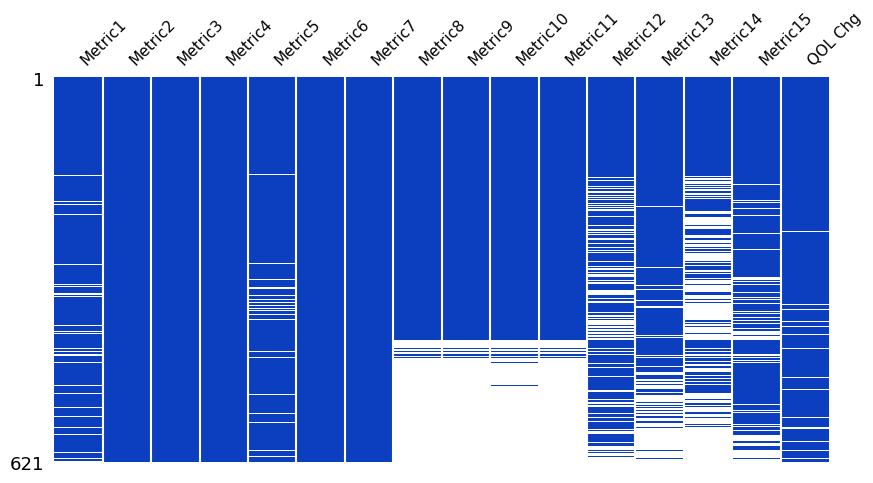

In [3]:
# nullity matrix
metrics = rctii.copy()
metrics.drop(columns=['Subject','Group', 'Group.2'], inplace=True)

msno.matrix(metrics, figsize=(10, 5), fontsize=11, color=(0.05, 0.25, 0.75), sparkline=False, sort='descending')
plt.show()


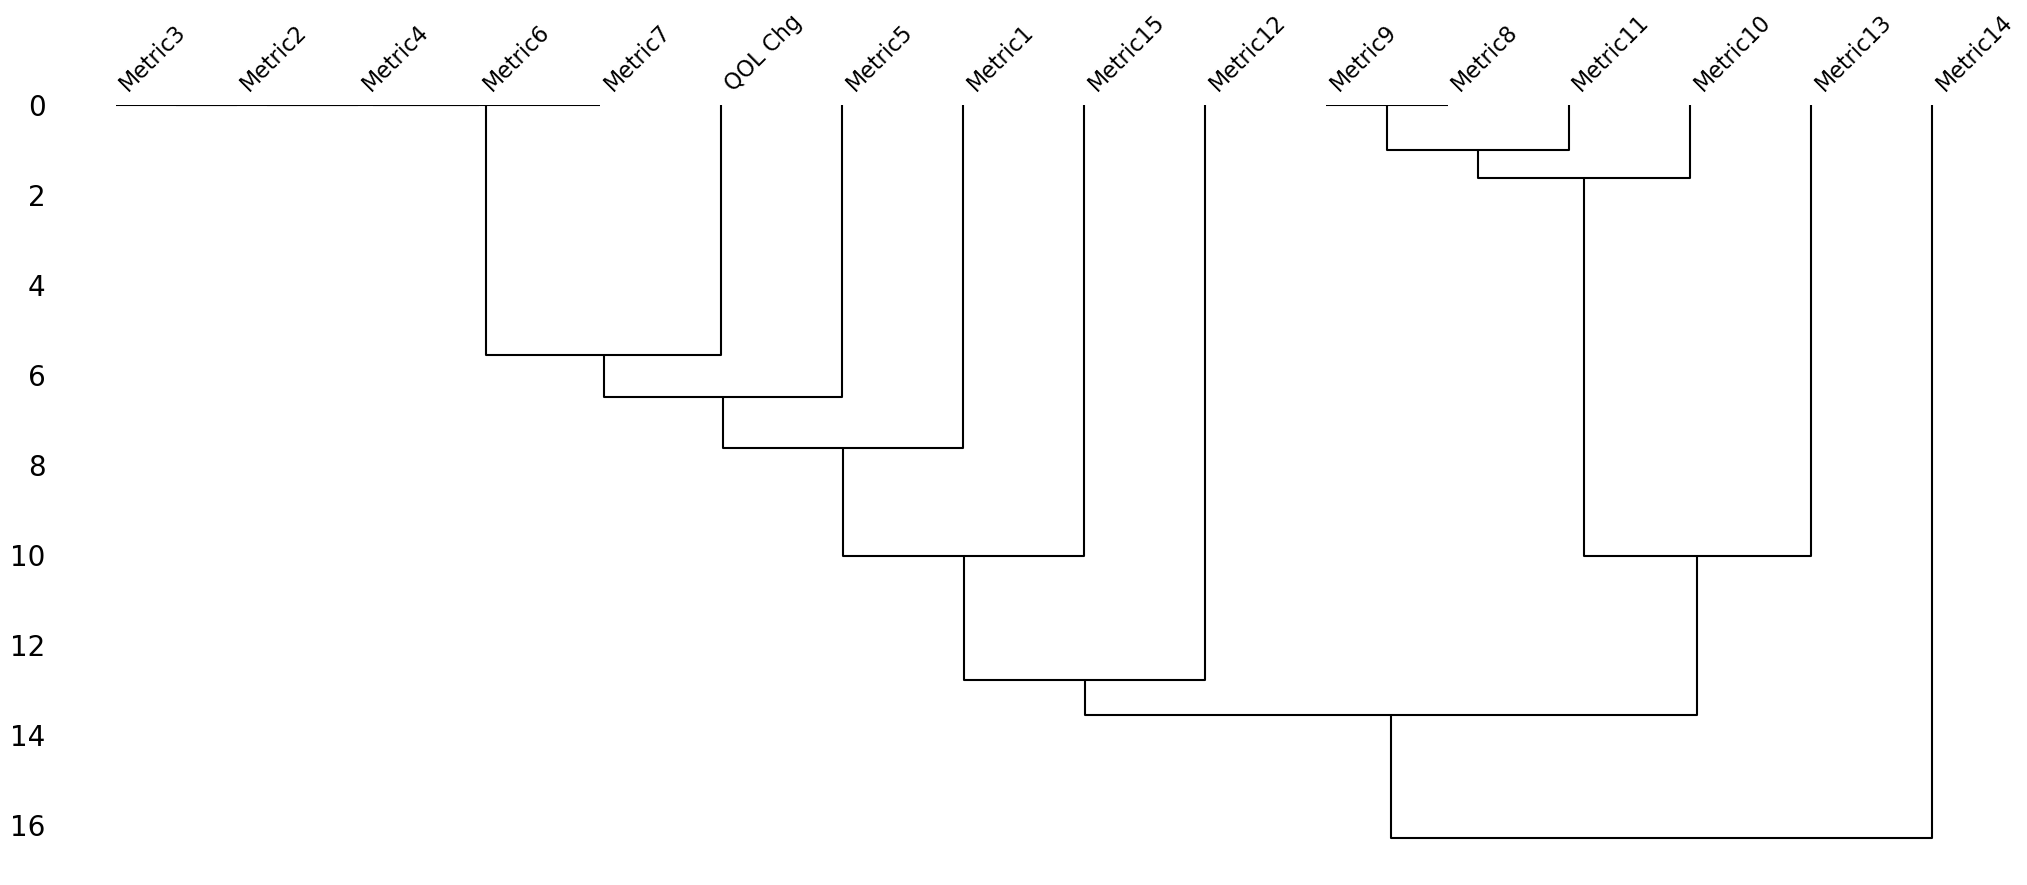

In [4]:
# missing value dendogram
msno.dendrogram(metrics)
plt.show()

Explain how a dendogram works!!

In [5]:
# split dataset into 4 subgroups
A0 = rctii[(rctii['Group'] == 'A') & (rctii['Group.2'] == 0)].copy()
B0 = rctii[(rctii['Group'] == 'B') & (rctii['Group.2'] == 0)].copy()
A1 = rctii[(rctii['Group'] == 'A') & (rctii['Group.2'] == 1)].copy()
B1 = rctii[(rctii['Group'] == 'B') & (rctii['Group.2'] == 1)].copy()

groups = [A0, B0, A1, B1]

In [6]:
print(A0.shape)
A0.head()

(160, 19)


,Subject,Group,Group.2,Metric1,Metric2,Metric3,Metric4,Metric5,Metric6,Metric7,Metric8,Metric9,Metric10,Metric11,Metric12,Metric13,Metric14,Metric15,QOL Chg
0,A001,A,0,0.262028,No,-1.503847,-1.132909,Yes,1,0.180529,NaN,NaN,NaN,NaN,0.379302,1.260856,4.852986,0.283523,NaN
3,A004,A,0,0.496643,Yes,1.099163,-0.113291,Yes,1,0.180529,0.054596,0.054596,1.969085,0.938661,-0.710555,1.227118,-0.064781,NaN,-1.560000
4,A005,A,0,NaN,No,-0.530462,-0.113291,Yes,0,-0.820439,-1.060425,-1.060425,-0.184369,-0.799152,0.836339,-0.384809,-0.418346,1.637173,7.288333
5,A006,A,0,NaN,No,-0.409022,-1.132909,Yes,1,-0.820439,NaN,NaN,-0.184369,NaN,-0.816025,-0.474777,-0.454506,NaN,10.938333
6,A007,A,0,0.646374,No,0.065526,-0.113291,Yes,0,1.181496,NaN,NaN,NaN,NaN,NaN,1.736936,1.421799,-1.061361,38.538750


In [7]:
print(B0.shape)
B0.head()

(148, 19)


,Subject,Group,Group.2,Metric1,Metric2,Metric3,Metric4,Metric5,Metric6,Metric7,Metric8,Metric9,Metric10,Metric11,Metric12,Metric13,Metric14,Metric15,QOL Chg
312,B001,B,0,0.642905,Yes,-0.433310,0.906327,Yes,0,2.182463,1.275809,1.275809,1.661449,1.112442,NaN,0.687310,1.100376,-1.208649,NaN
313,B002,B,0,0.298816,No,0.418168,-1.132909,Yes,1,0.180529,NaN,NaN,NaN,NaN,0.625399,NaN,-0.104959,-1.012265,-14.063333
314,B003,B,0,NaN,No,-0.153532,-0.113291,Yes,1,1.181496,-0.172960,-0.172960,0.892358,0.591098,NaN,0.462390,-0.305848,NaN,46.510000
317,B006,B,0,NaN,Yes,-0.141388,-0.113291,No,0,-0.820439,-1.303151,-1.303151,-1.722550,-1.668058,-0.253518,-1.134542,-0.466559,-0.929853,10.937500
319,B008,B,0,NaN,No,-1.248357,-0.113291,No,0,0.180529,NaN,NaN,NaN,NaN,-0.042578,-0.249857,NaN,0.418537,-10.154167


In [8]:
print(A1.shape)
A1.head()

(152, 19)


,Subject,Group,Group.2,Metric1,Metric2,Metric3,Metric4,Metric5,Metric6,Metric7,Metric8,Metric9,Metric10,Metric11,Metric12,Metric13,Metric14,Metric15,QOL Chg
1,A002,A,1,-0.035071,No,-0.418831,0.906327,No,0,-0.820439,-0.567389,-0.567389,-0.645823,-0.451589,-0.112891,-0.699697,-0.562986,-1.057854,-1.872500
2,A003,A,1,-1.372828,No,1.804914,-1.132909,No,0,1.181496,2.443926,2.443926,4.583993,3.892942,NaN,1.437043,2.265533,0.227413,NaN
7,A008,A,1,-0.349793,No,0.162678,-0.113291,No,0,-0.820439,-0.036426,-0.036426,0.584722,0.417317,0.062892,-0.504766,0.095930,2.140408,-7.030833
12,A013,A,1,0.235365,No,-0.628081,-1.132909,Yes,1,0.180529,NaN,NaN,NaN,NaN,-0.042578,-0.673456,2.024466,-0.286343,-19.788333
13,A014,A,1,-0.263920,No,-1.236213,0.906327,Yes,1,0.180529,NaN,NaN,NaN,NaN,2.559017,1.886883,1.200821,-0.845689,58.596250


In [9]:
print(B1.shape)
B1.head()

(161, 19)


,Subject,Group,Group.2,Metric1,Metric2,Metric3,Metric4,Metric5,Metric6,Metric7,Metric8,Metric9,Metric10,Metric11,Metric12,Metric13,Metric14,Metric15,QOL Chg
315,B004,B,1,-0.180494,No,-0.007805,-0.113291,Yes,1,-0.820439,-1.356247,-1.356247,-1.876368,-2.189402,2.769957,0.008801,0.176286,0.024014,0.004583
316,B005,B,1,-1.348408,No,0.016950,-1.132909,No,0,0.180529,NaN,NaN,NaN,NaN,0.379302,-0.272349,-0.466559,NaN,27.339167
318,B007,B,1,-1.045001,No,-1.284789,-0.113291,No,0,-0.820439,-0.468781,-0.468781,-0.030550,-0.277808,-0.816025,0.050037,-0.506737,-1.511993,37.500833
321,B010,B,1,-0.267430,No,-0.360447,-1.132909,Yes,1,-0.820439,-1.394173,-1.394173,-1.722550,-2.015621,0.660556,-1.393200,NaN,NaN,NaN
323,B012,B,1,-0.841821,No,-0.664513,-1.132909,No,0,-0.820439,-0.848040,-0.848040,-0.799641,-0.972933,3.156681,-0.339825,-0.546915,0.520236,7.293750


In [10]:
# impute missing values, A0
columns_to_impute = ['Metric1', 'Metric8', 'Metric9', 'Metric10', 'Metric11', 'Metric12', 'Metric13', 'Metric14','Metric15']
mean_imputer = SimpleImputer(strategy='mean')
preprocessor = ColumnTransformer(transformers=[('mean_imputer', mean_imputer, columns_to_impute)], remainder='passthrough')

def impute_missing_values(group):
    imputed_array = preprocessor.fit_transform(group)
    remainder_cols = [col for col in group.columns if col not in columns_to_impute]
    new_column_order = columns_to_impute + remainder_cols
    group_imputed = pd.DataFrame(imputed_array, columns=new_column_order)
    group_imputed = group_imputed[group.columns]
    return group_imputed

A0_imputed = impute_missing_values(A0)
B0_imputed = impute_missing_values(B0)
A1_imputed = impute_missing_values(A1)
B1_imputed = impute_missing_values(B1)

def impute_metric_5(group):
    missing_mask = group['Metric5'].isna()
    random_choices = np.random.choice(['Yes', 'No'], size=missing_mask.sum(), p=[0.5, 0.5])
    group.loc[missing_mask, 'Metric5'] = random_choices
    return group

A0_imputed = impute_metric_5(A0_imputed)
B0_imputed = impute_metric_5(B0_imputed)
A1_imputed = impute_metric_5(A1_imputed)
B1_imputed = impute_metric_5(B1_imputed)

In [11]:
rctii_imputed = pd.concat([A0_imputed, A1_imputed, B0_imputed, B1_imputed])
rctii_imputed = rctii_imputed.sort_index()
print(f"Original shape: {rctii.shape}")
print(f"Imputed shape: {rctii_imputed.shape}")

Original shape: (621, 19)
Imputed shape: (621, 19)


In [12]:
A0_imputed.drop(columns=['Group', 'Group.2'], inplace=True)
B0_imputed.drop(columns=['Group', 'Group.2'], inplace=True)
A1_imputed.drop(columns=['Group', 'Group.2'], inplace=True)
B1_imputed.drop(columns=['Group', 'Group.2'], inplace=True)

rctii_imputed['Group'] = rctii_imputed['Group'] + rctii_imputed['Group.2'].astype(str)
rctii_imputed = rctii_imputed.drop(columns=['Group.2'])

rctii_imputed.to_csv("../data/RCTII Anonymized Data (imputed).csv", index=False)

- pie chart comparing groups

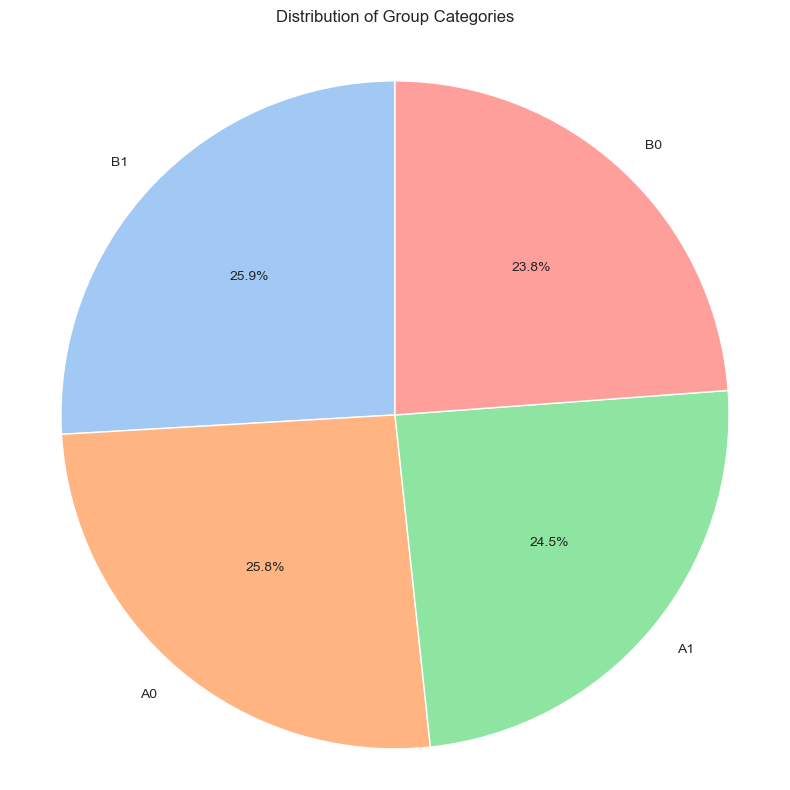

In [14]:
sns.set_style("white")

# Create figure and axis
plt.figure(figsize=(8, 8))

# Get value counts
group_counts = rctii_imputed['Group'].value_counts()

# Create pie chart
plt.pie(group_counts, 
        labels=group_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'))

# Add title
plt.title('Distribution of Group Categories', pad=20)

# Ensure pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()